In [1]:
from sklearn.datasets import fetch_olivetti_faces
from matplotlib import pyplot as plot
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from random import randint
%matplotlib inline

In [2]:
dataset = fetch_olivetti_faces()
data = dataset['data']

In [3]:
colors = [
    (r / 4, g / 3, b)
    for r in range(5)
    for g in range(4)
    for b in range(2)
]

In [4]:
def test_n_components(n):
    for i in range(5):
        figure, axis = plot.subplots(1, 2, figsize=(15, 15))    
        index = randint(0, len(data))
        axis[0].imshow(data[index].reshape(64, 64), cmap='gray')
        pca = PCA(n_components=n)
        Y = pca.fit_transform(data)
        X_hat = pca.inverse_transform(Y)
        axis[1].imshow(X_hat[index].reshape(64, 64), cmap='gray')

Нарисуем картинки с разным числом компонени, чтобы отловить момент, в который теряются индивидуальные различия.

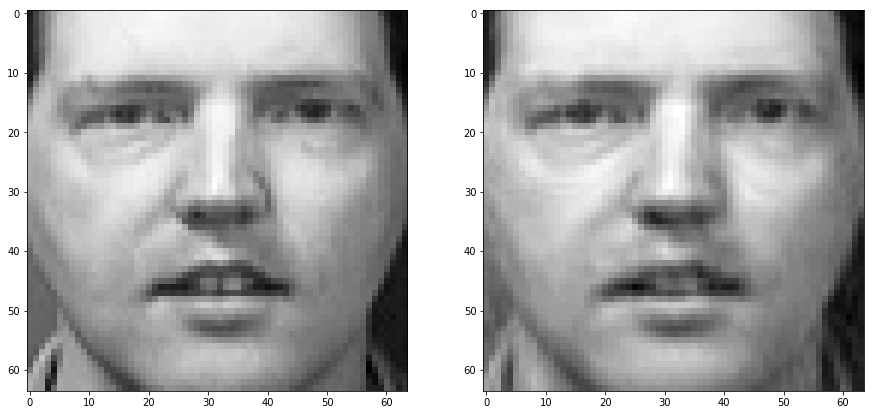

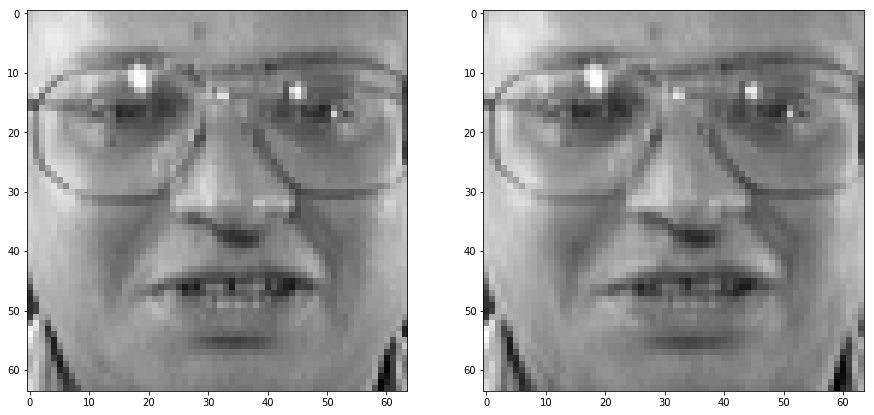

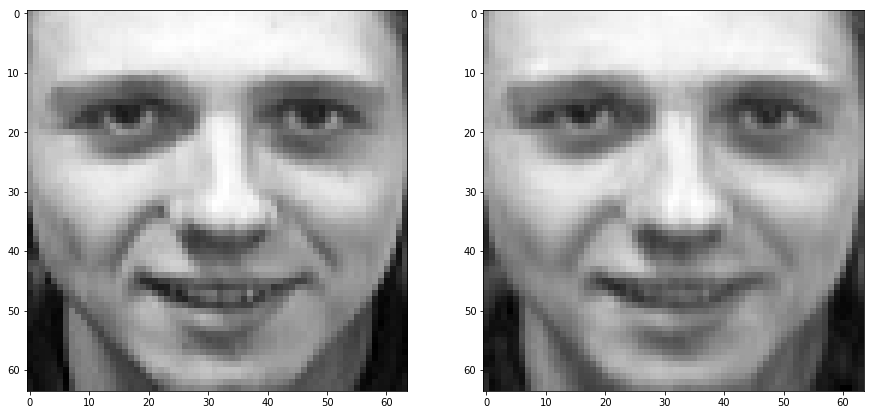

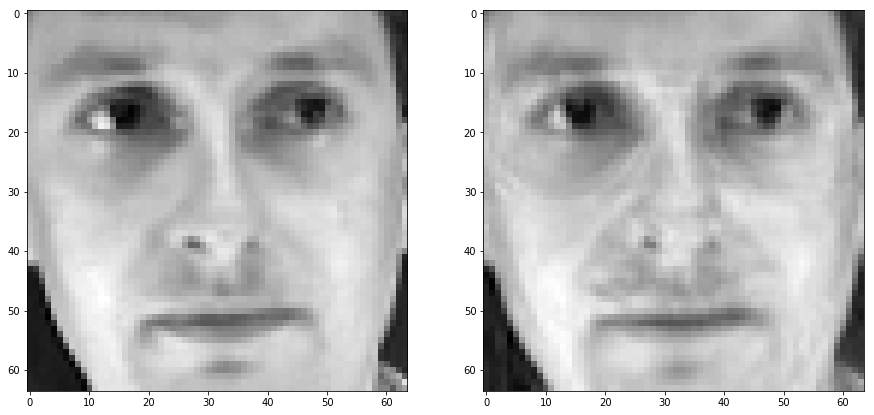

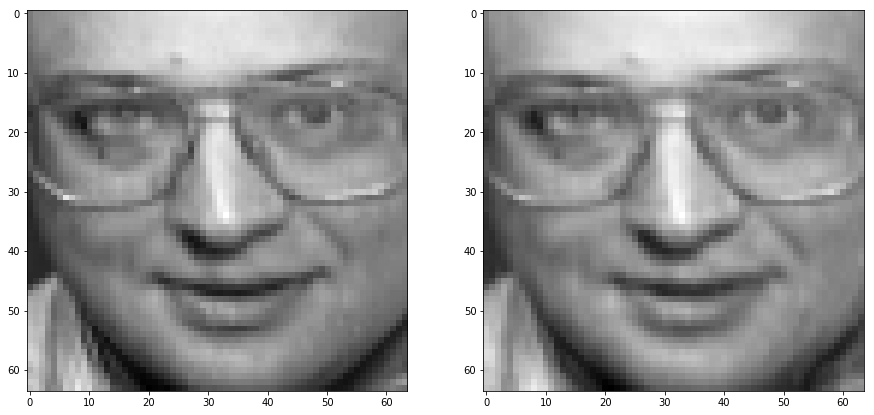

In [6]:
test_n_components(200)

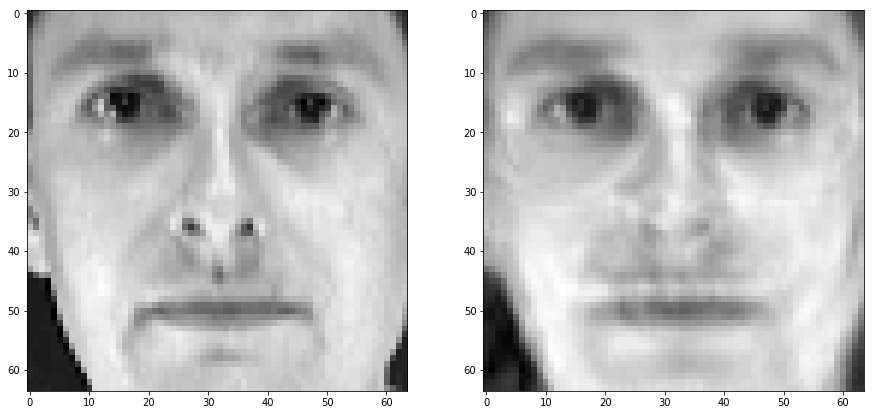

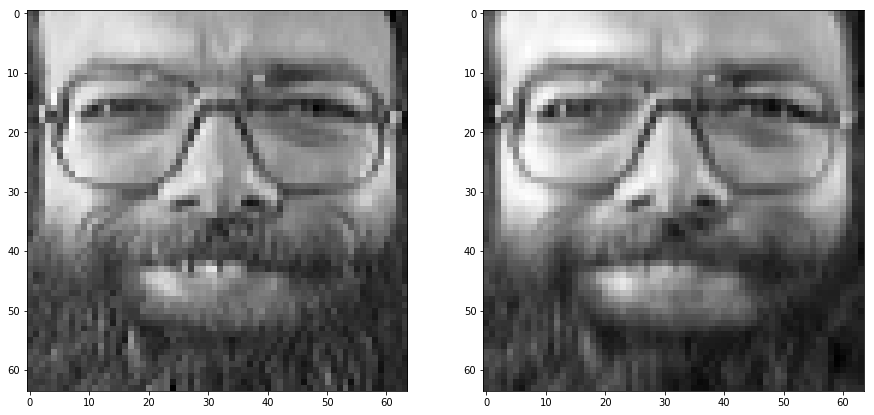

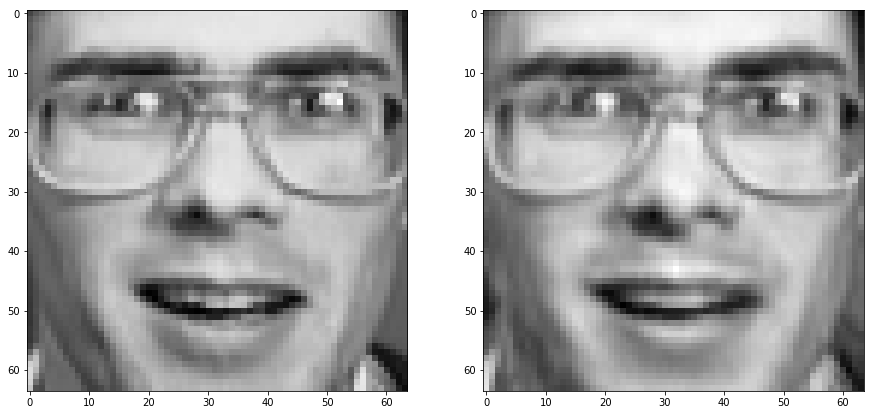

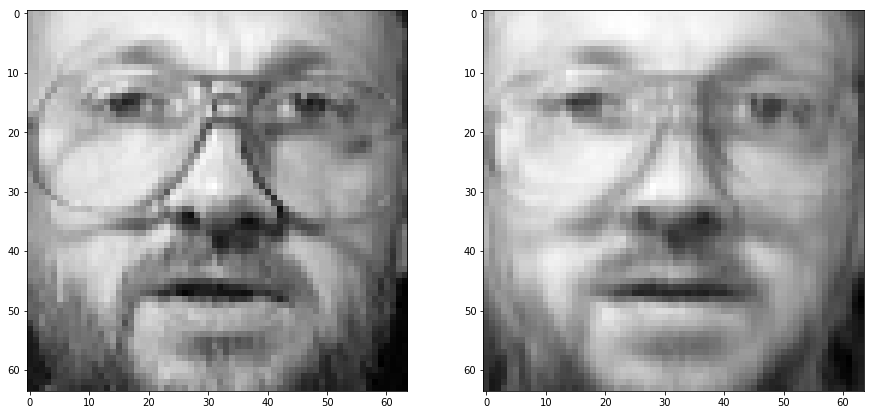

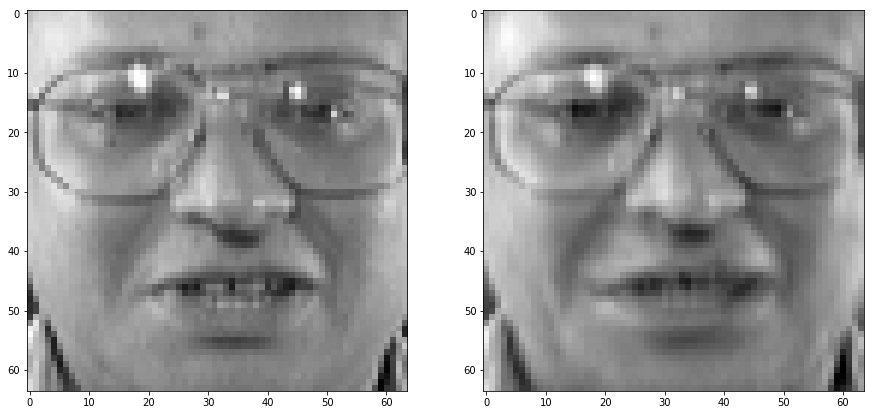

In [7]:
test_n_components(100)

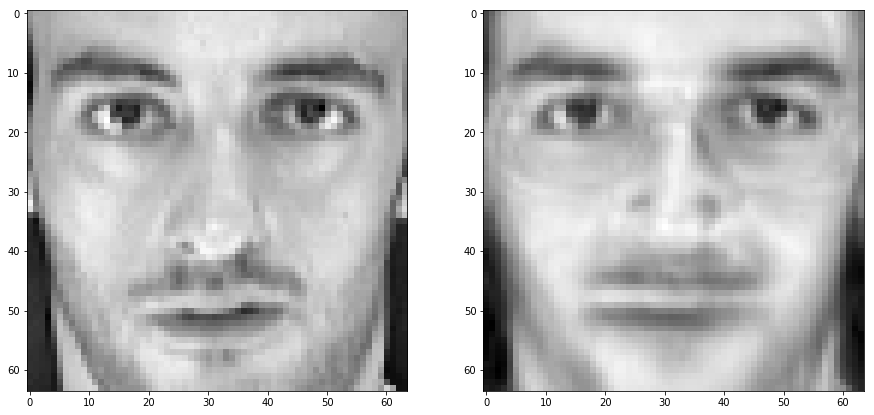

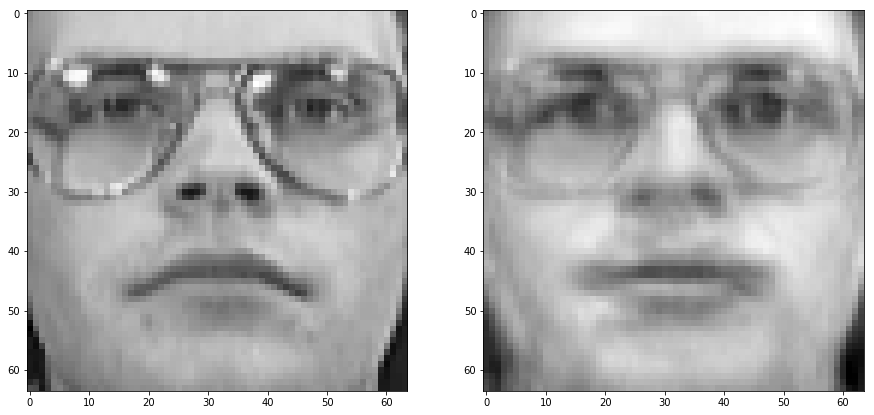

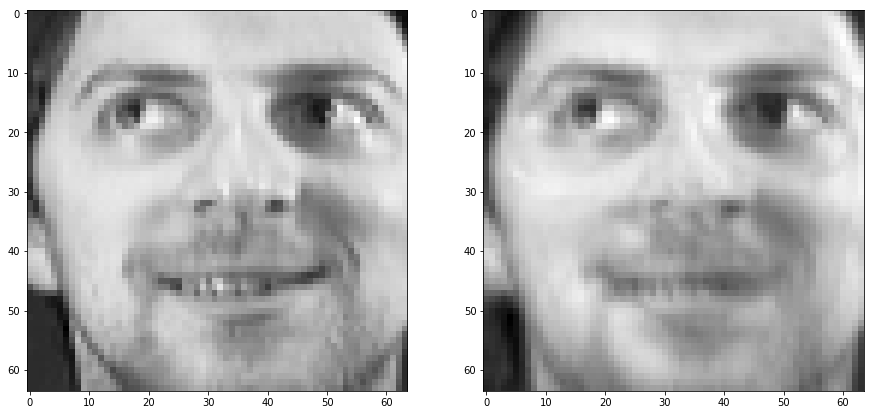

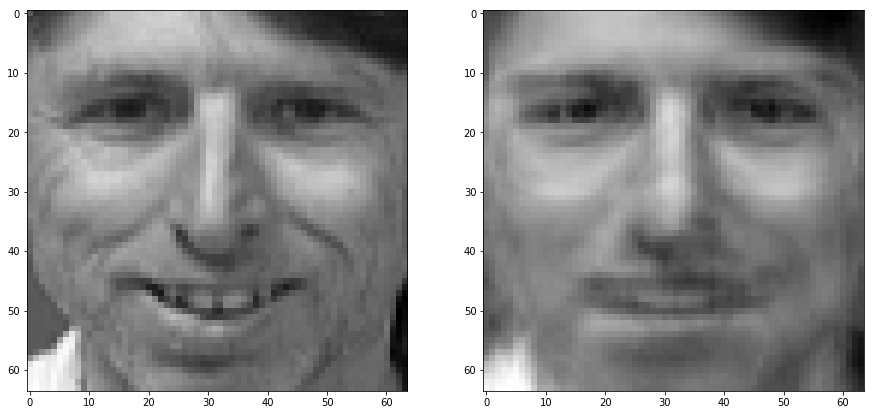

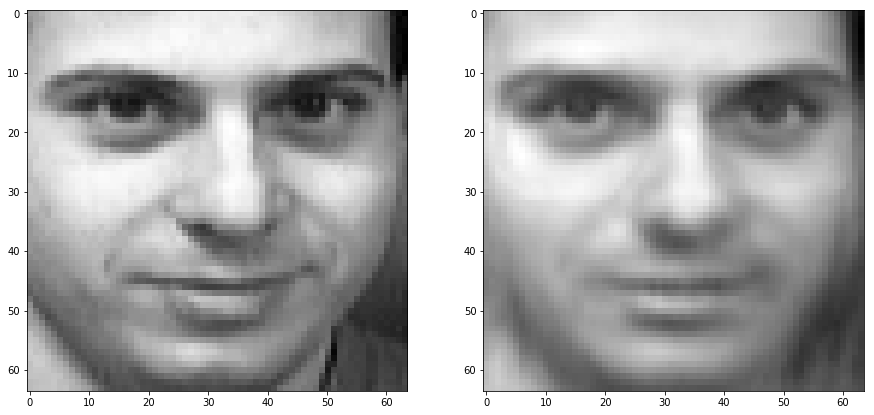

In [8]:
test_n_components(50)

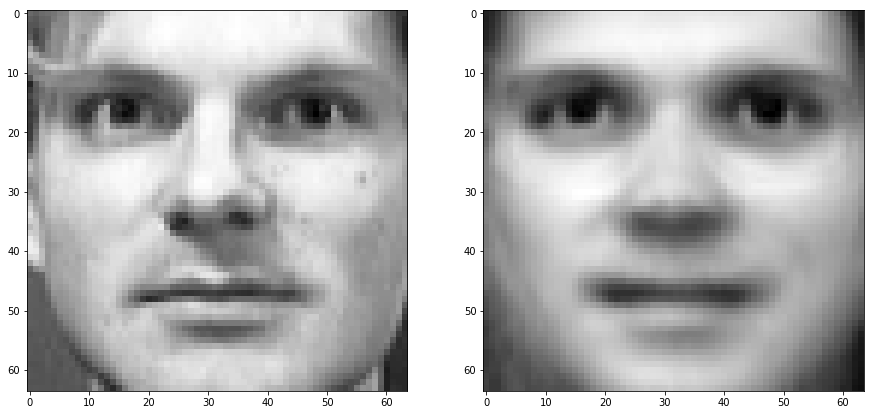

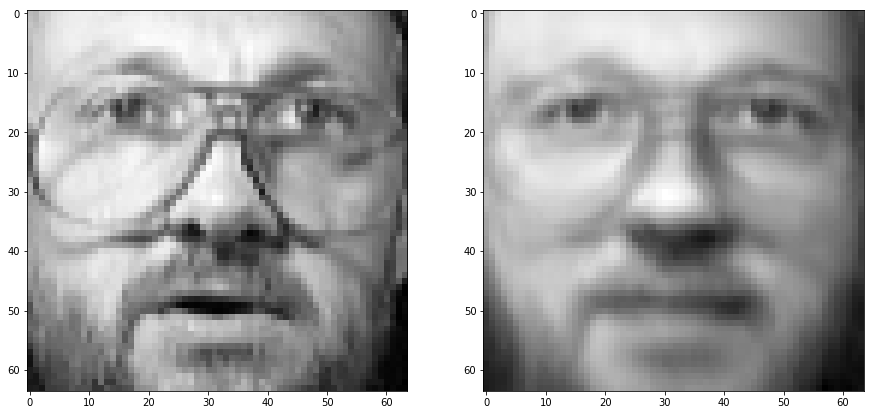

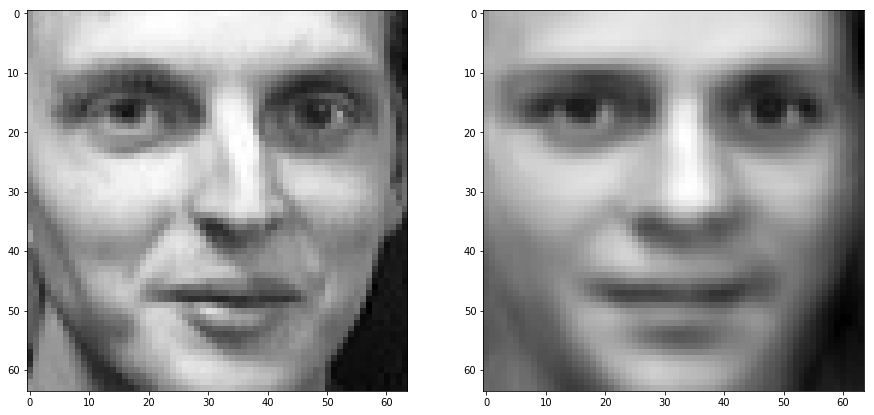

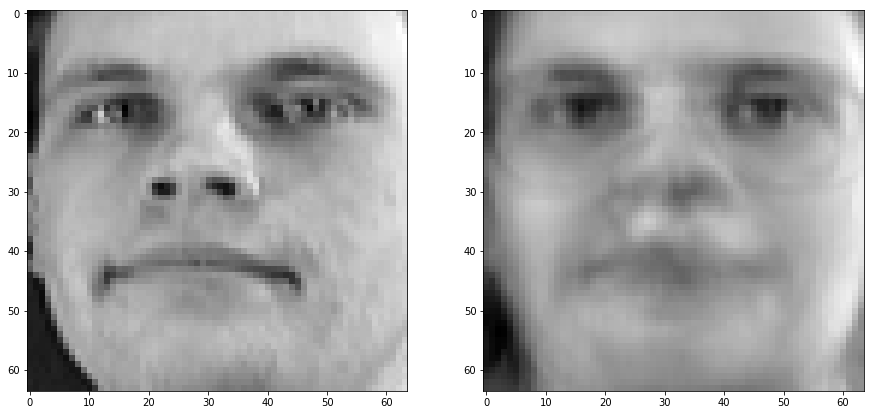

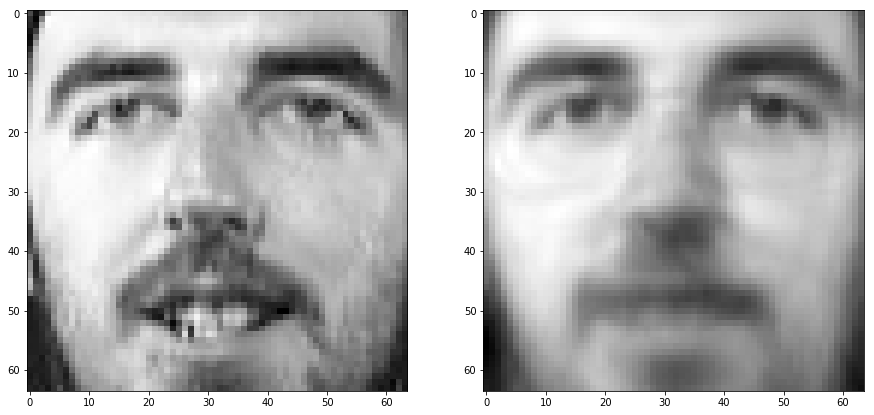

In [9]:
test_n_components(20)

При использовании 50 компонент появляются артифакты. При количестве компонент около 20 теряются индивидуальные различия. Теперь визуализируем pca и tsne.

In [10]:
pca = PCA(n_components=2)
pca_visualize = pca.fit_transform(data)
tsne = TSNE(n_components=2)
tsne_visualize = tsne.fit_transform(data)

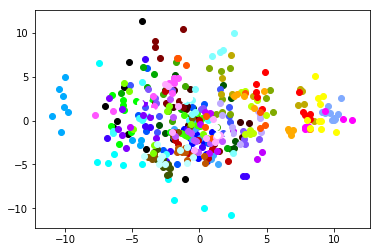

In [11]:
for i in range(len(pca_visualize)):
    plot.scatter(pca_visualize[i][0], pca_visualize[i][1], color=colors[dataset['target'][i]])

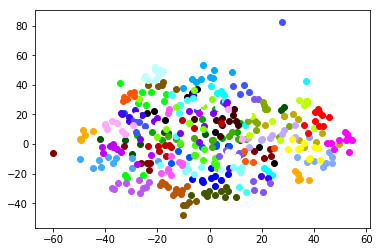

In [12]:
for i in range(len(pca_visualize)):
    plot.scatter(tsne_visualize[i][0], tsne_visualize[i][1], color=colors[dataset['target'][i]])

tsne справился лучше. Заметны классовые кучки. Это значит, что локальные расстояния в исходном пространстве, которые учитывает tsne здесь имеют достаточное значение и огранисиваться линейными преобразованиями нельзя.